In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/Train (1).csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (21799, 785)
Shape of X after separating features: (21799, 784)


In [ ]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (21799, 28, 28, 1)


In [ ]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (21799, 10)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (17439, 28, 28, 1)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential


model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7791 - loss: 0.7503 - val_accuracy: 0.9296 - val_loss: 0.2214
Epoch 2/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9429 - loss: 0.1877 - val_accuracy: 0.9518 - val_loss: 0.1567
Epoch 3/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9663 - loss: 0.1156 - val_accuracy: 0.9470 - val_loss: 0.1612
Epoch 4/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9747 - loss: 0.0809 - val_accuracy: 0.9573 - val_loss: 0.1357
Epoch 5/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9583 - val_loss: 0.1356
Epoch 6/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9886 - loss: 0.0420 - val_accuracy: 0.9599 - val_loss: 0.1358
Epoch 7/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9929 - loss: 0.0277 - val_accuracy: 0.9601 - val_loss: 0.1400
Epoch 8/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0243 - val_accuracy: 0.

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9632 - loss: 0.1618
Validation Accuracy: 96.33%


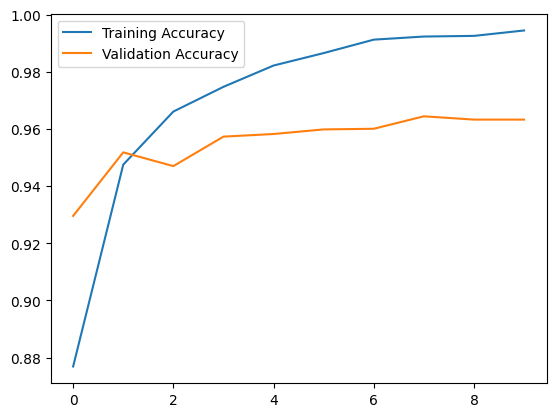

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


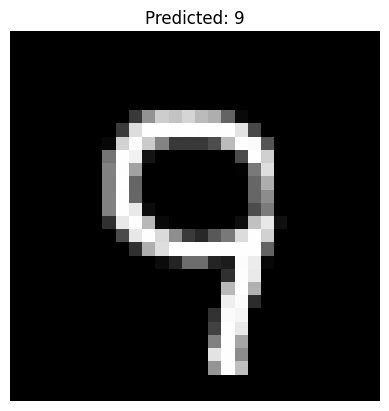

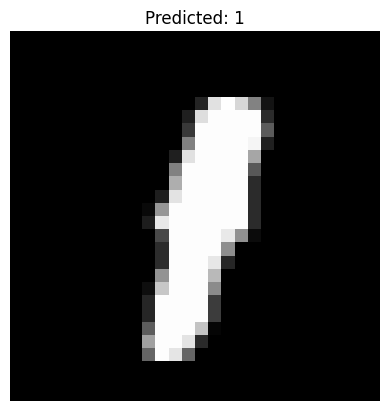

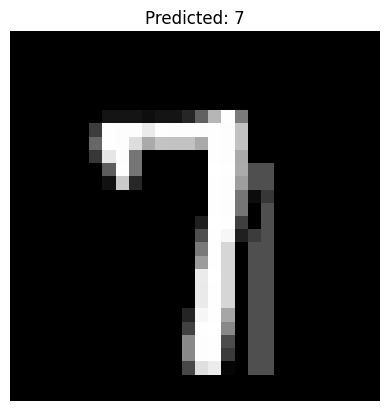

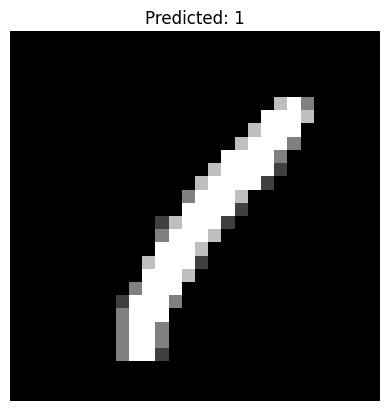

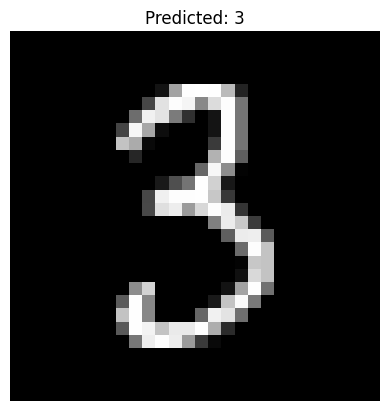

In [ ]:
test_data = pd.read_csv('/content/test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# --- 1. Data Loading ---
# Load the datasets from your uploaded CSV files
try:
    train_data = pd.read_csv('Train (1).csv')
    test_data = pd.read_csv('test.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'Train (1).csv' and 'test.csv' are in the same directory.")
    # Exit if files are not found
    exit()

Datasets loaded successfully.


In [ ]:
# --- 2. Data Analysis ---
print("\n--- Data Analysis ---")
print(f"Shape of training data: {train_data.shape}")
print(f"Shape of test data: {test_data.shape}")



--- Data Analysis ---
Shape of training data: (42000, 785)
Shape of test data: (5600, 784)


In [ ]:
# Separate labels from pixel values in the training data
X = train_data.drop('label', axis=1)
y = train_data['label']



Visualizing sample images...


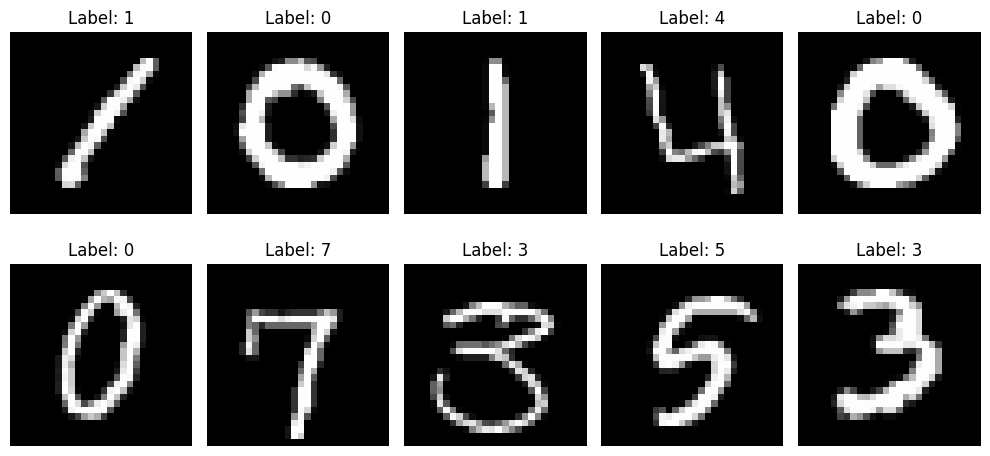

In [ ]:
# Visualize a few sample images and their labels
print("\nVisualizing sample images...")
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    # Reshape the 784-pixel row into a 28x28 image
    image = X.iloc[i].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y.iloc[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



Visualizing label distribution...


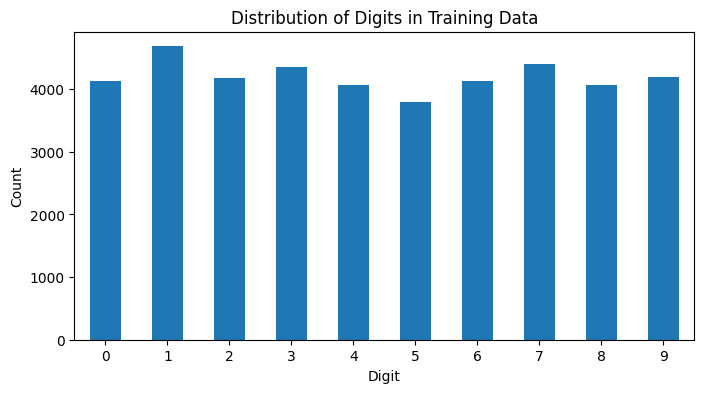

In [ ]:
# Visualize the distribution of labels
print("\nVisualizing label distribution...")
plt.figure(figsize=(8, 4))
y.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Digits in Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# --- 3. Data Preprocessing ---
print("\n--- Data Preprocessing ---")
# Normalize the pixel values from [0, 255] to [0, 1]
X = X.values / 255.0
# The test data from Kaggle often doesn't have labels, we'll use it for final prediction later
X_test = test_data.values / 255.0



--- Data Preprocessing ---


In [ ]:
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Shape of training data after split: {X_train.shape}")
print(f"Shape of validation data: {X_val.shape}")
print(f"Shape of test data: {X_test.shape}")


Shape of training data after split: (37800, 28, 28, 1)
Shape of validation data: (4200, 28, 28, 1)
Shape of test data: (5600, 28, 28, 1)


In [ ]:
# --- 4. Create and Train the Model ---
print("\n--- Model Training ---")
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))



--- Model Training ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.7938 - loss: 0.6374 - val_accuracy: 0.9707 - val_loss: 0.0928
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.9649 - loss: 0.1175 - val_accuracy: 0.9807 - val_loss: 0.0623
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9755 - loss: 0.0766 - val_accuracy: 0.9829 - val_loss: 0.0509
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - accuracy: 0.9811 - loss: 0.0635 - val_accuracy: 0.9855 - val_loss: 0.0476
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9910 - val_loss: 0.0339
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9869 - loss: 0.0435 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.9889 - loss: 0.0383 - val_accuracy: 0.9907 - val_loss: 0.0296
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.9891 - loss: 0.0344 - 

In [ ]:
# --- 5. Evaluate and Save the Model ---
print("\nEvaluating model on validation data...")
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model on validation data...
132/132 - 1s - 9ms/step - accuracy: 0.9912 - loss: 0.0365
Validation Accuracy: 99.12%


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


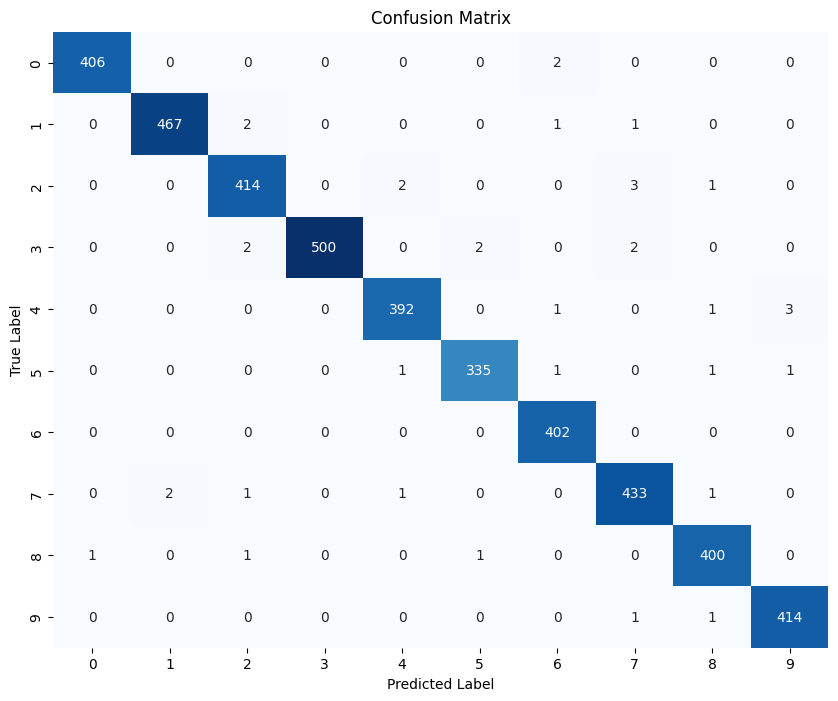

In [ ]:
# Generate predictions for the validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the trained model
model.save("mnist_model.h5")
print("\nModel saved to 'mnist_model.h5'")


Model saved to 'mnist_model.h5'


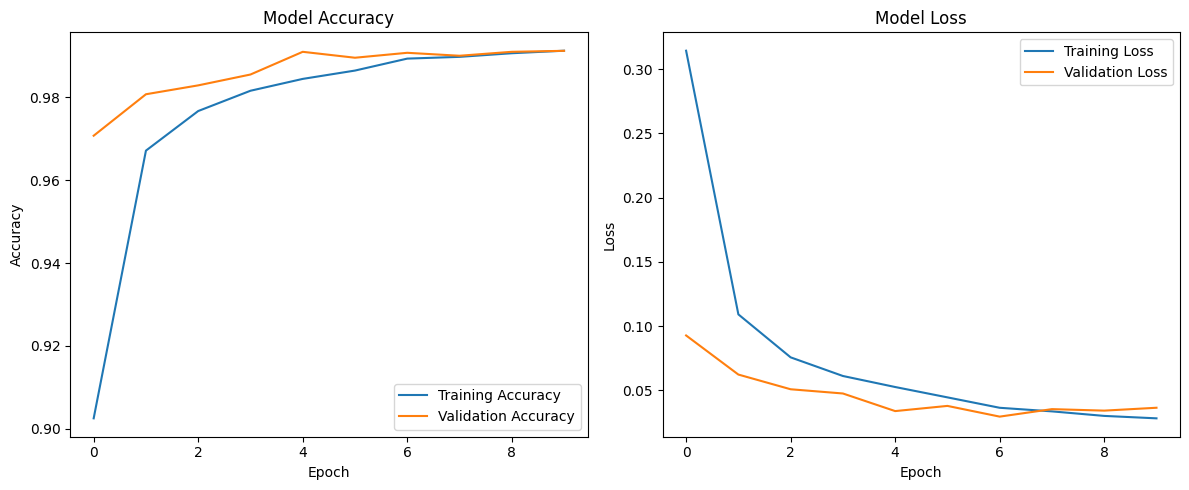

In [ ]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()